## GNNs

In this notebook I will do some basic operations using the networkx library. After that I will show how to generate embeddings using the torch_geometric library.

In [ ]:
#https://medium.com/@prathameshsonawane/graph-machine-learning-intro-4e35098f5176
#https://www.youtube.com/watch?v=VDzrvhgyxsU
%pip install networkx
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### An undirected, unweighted graph with a self edge

Creating a simple graph using the networkx library. All connections are represented using the adjacency matrix (node to node).
The incidence matrix (node to edge) isn't correct, Node 2 is connected to 2 edges, while node 1 and 3 are connected to only one edge. Where is the self edge? Just to show one needs to take care when using networkx library.

G weighted graph: False
G is directed: False
Graph to numpy
[[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]
Adjacency matrix
[[0 1 0]
 [1 0 1]
 [0 1 1]]
Incidence matrix
<Compressed Sparse Column sparse array of dtype 'float64'
	with 4 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
[[1. 0. 0.]
 [1. 1. 0.]
 [0. 1. 0.]]


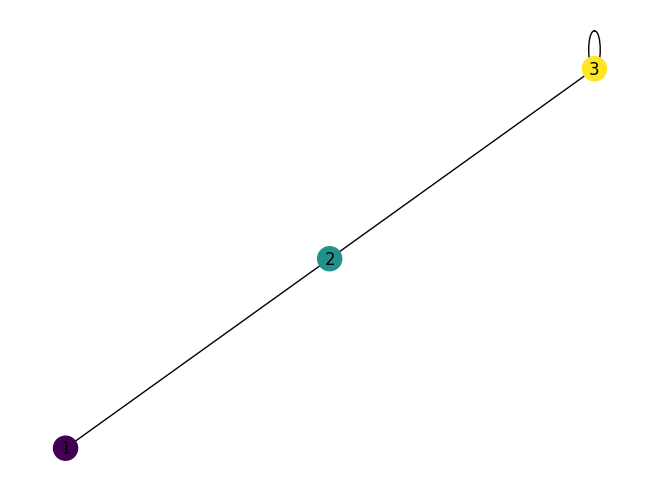

In [3]:
G = nx.Graph()
G.add_edge(1,2)
G.add_edge(3,2)
G.add_edge(3,3)
nx.draw(G,cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(f"G weighted graph: {nx.is_weighted(G)}")
print(f"G is directed: {nx.is_directed(G)}")
G_np=nx.to_numpy_array(G)
print("Graph to numpy")
print(G_np)
print("Adjacency matrix")
A= nx.adjacency_matrix(G)
print(A.todense())
print("Incidence matrix")
i=nx.incidence_matrix(G)
print(i)
print(i.todense())

### A graph with weighted edges

As all the edges in the graph are weighted, this graph is a weighted graph. As the graph is defined using the nx.Graph() it is undirected. The self edges are neglected in the incidence matrix. In the adjacency matrix the weights are there to represent the connections between the nodes.

G weighted graph True
G is directed False
G to numpy graph
[[0. 2. 0.]
 [2. 4. 0.]
 [0. 0. 5.]]
Adjacency matrix
[[0 2 0]
 [2 4 0]
 [0 0 5]]
Incidence matrix
<Compressed Sparse Column sparse array of dtype 'float64'
	with 2 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 0.]]


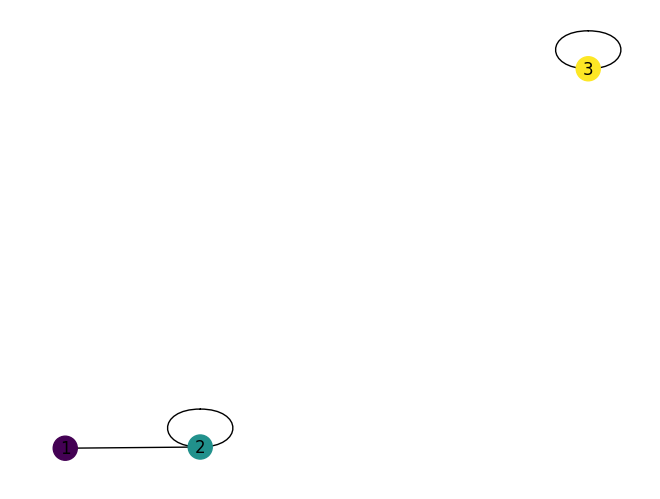

In [4]:
G = nx.Graph()
G.add_edge(1,2, weight=2)
G.add_edge(2,2, weight=4)
G.add_edge(3,3, weight=5)
nx.draw(G,cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(f"G weighted graph {nx.is_weighted(G)}")
print(f"G is directed {nx.is_directed(G)}")
print("G to numpy graph")
G_np=nx.to_numpy_array(G)
print(G_np)
print("Adjacency matrix")
A= nx.adjacency_matrix(G)
print(A.todense())
print("Incidence matrix")
i=nx.incidence_matrix(G)
print(i)
print(i.todense())

### A directed and weighted graph, with self edges.



G weighted graph True
G is directed True
G to numpy graph
[[0. 2. 0. 0.]
 [0. 4. 0. 0.]
 [0. 0. 5. 7.]
 [0. 0. 0. 0.]]
Adjacency matrix
[[0 2 0 0]
 [0 4 0 0]
 [0 0 5 7]
 [0 0 0 0]]
Incidence matrix
<Compressed Sparse Column sparse array of dtype 'float64'
	with 4 stored elements and shape (4, 4)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


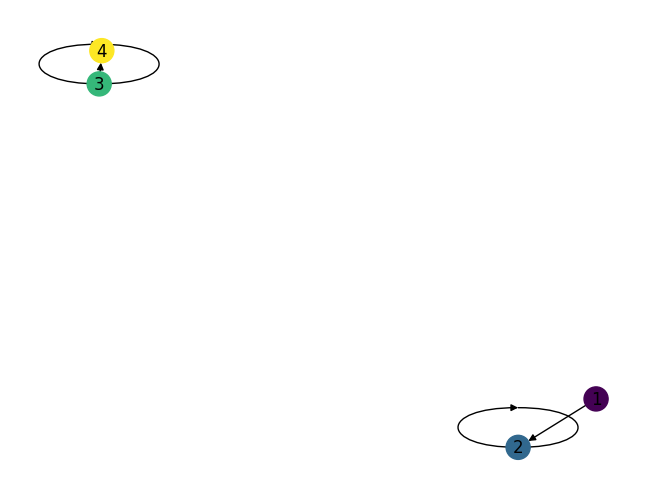

In [5]:
G = nx.DiGraph()
G.add_edge(1,2, weight=2)
G.add_edge(2,2, weight=4)
G.add_edge(3,3, weight=5)
G.add_edge(3,4, weight=7)
nx.draw(G,cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(f"G weighted graph {nx.is_weighted(G)}")
print(f"G is directed {nx.is_directed(G)}")
print("G to numpy graph")
G_np=nx.to_numpy_array(G)
print(G_np)
print("Adjacency matrix")
A= nx.adjacency_matrix(G)
print(A.todense())
print("Incidence matrix")
i=nx.incidence_matrix(G)
print(i)
print(i.todense())

G weighted graph True
G is directed True
[[0. 2. 5.]
 [0. 0. 4.]
 [0. 0. 0.]]
ajacency matrix
[[0 2 5]
 [0 0 4]
 [0 0 0]]
[0 0 0]
incidence matrix
<Compressed Sparse Column sparse array of dtype 'float64'
	with 6 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (0, 1)	1.0
  (2, 1)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
[[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]
laplacian matrix
<Compressed Sparse Row sparse array of dtype 'int64'
	with 5 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	7
  (0, 1)	-2
  (0, 2)	-5
  (1, 1)	4
  (1, 2)	-4
[[ 7 -2 -5]
 [ 0  4 -4]
 [ 0  0  0]]


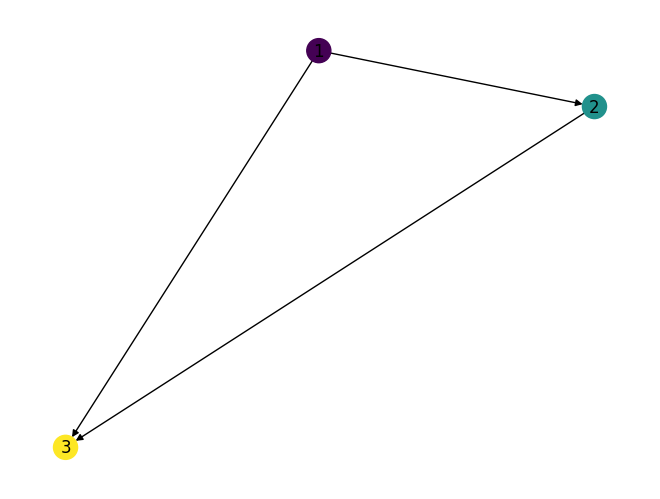

In [35]:
G = nx.DiGraph()
G.add_edge(1,2, weight=2)
G.add_edge(2,3, weight=4)
G.add_edge(1,3, weight=5)
nx.draw(G,cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(f"G weighted graph {nx.is_weighted(G)}")
print(f"G is directed {nx.is_directed(G)}")
G_np=nx.to_numpy_array(G)
print(G_np)
print("ajacency matrix")
A= nx.adjacency_matrix(G)
print(A.todense())
print(A.diagonal())
print("incidence matrix")
i=nx.incidence_matrix(G)
print(i)
print(i.todense())
print("laplacian matrix")
L=nx.laplacian_matrix(G)
print(L)
print(L.todense())

G weighted graph True
G is directed False
[[0. 2. 5.]
 [2. 0. 4.]
 [5. 4. 0.]]
ajacency matrix
[[0 2 5]
 [2 0 4]
 [5 4 0]]
[0 0 0]
incidence matrix
<Compressed Sparse Column sparse array of dtype 'float64'
	with 6 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1.0
  (1, 0)	1.0
  (0, 1)	1.0
  (2, 1)	1.0
  (1, 2)	1.0
  (2, 2)	1.0
[[1. 1. 0.]
 [1. 0. 1.]
 [0. 1. 1.]]
laplacian matrix
<Compressed Sparse Row sparse array of dtype 'int64'
	with 9 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	7
  (0, 1)	-2
  (0, 2)	-5
  (1, 0)	-2
  (1, 1)	6
  (1, 2)	-4
  (2, 0)	-5
  (2, 1)	-4
  (2, 2)	9
[[ 7 -2 -5]
 [-2  6 -4]
 [-5 -4  9]]


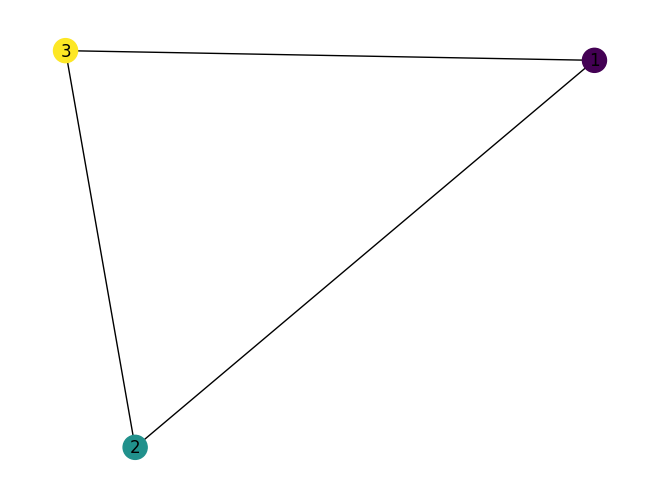

In [ ]:
G = nx.Graph()
G.add_edge(1,2, weight=2)
G.add_edge(2,3, weight=4)
G.add_edge(1,3, weight=5)
nx.draw(G,cmap=plt.get_cmap('viridis'), node_color=G, with_labels=True)
print(f"G weighted graph {nx.is_weighted(G)}")
print(f"G is directed {nx.is_directed(G)}")
G_np=nx.to_numpy_array(G)
print(G_np)
print("ajacency matrix")
A= nx.adjacency_matrix(G)
print(A.todense())
print(A.diagonal())
print("incidence matrix")
i=nx.incidence_matrix(G)
print(i)
print(i.todense())
print("laplacian matrix")
L=nx.laplacian_matrix(G)
print(L)
print(L.todense())
nx.degre

In [45]:
print(G.degree)
D = np.diag(G.degree)
degrees = [G.degree[node] for node in G.nodes]
print(degrees)
D = np.diag(degrees)
print(D)
A=nx.adjacency_matrix(G)
L=D-A
print(L)


[(1, 2), (2, 2), (3, 2)]
[2, 2, 2]
[[2 0 0]
 [0 2 0]
 [0 0 2]]
[[ 2 -2 -5]
 [-2  2 -4]
 [-5 -4  2]]


### A graph with valued nodes

Showing a graph containing valued nodes. Calculating the clustering coefficient using the formula

$$ C_i=\frac{2*numOfEdgesOfNeighborsOfi}{degreeOfNodei*(degreeOfNodei-1)}

When assessing graphs and nodes, things like clustering indices, shortest paths, cycles are things to consider.

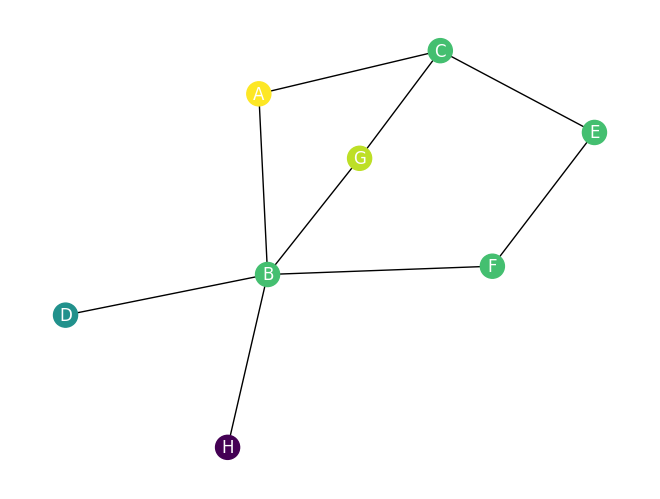

neighborhood ['A', 'D', 'H', 'G', 'F']
The clustering coefficient of node 'B' is:
0
As the neighbors of 'B' have no edges, its clustering index is 0


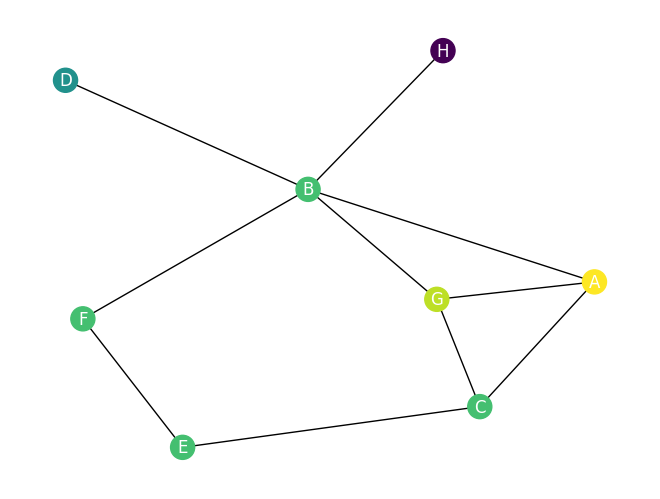

After adding an edge between 'A' and 'G', two neighbors of 'B'. Its clustering index becomes:
0.1
Or two times 1 divided by the product of the degree (number of neighbors) and the degree minus 1 being 5 times 4.
The clustering index of the whole graph
{'A': 0.6666666666666666, 'B': 0.1, 'C': 0.3333333333333333, 'D': 0, 'E': 0, 'F': 0, 'H': 0, 'G': 0.6666666666666666}
[['A', 'B', 'G'], ['A', 'B', 'G', 'C'], ['A', 'B', 'F', 'E', 'C'], ['A', 'B', 'F', 'E', 'C', 'G'], ['A', 'C', 'E', 'F', 'B', 'G'], ['A', 'C', 'G'], ['B', 'G', 'C', 'E', 'F']]
['H', 'B', 'F', 'E']
3


In [ ]:
G = nx.Graph()
G.add_edges_from(
    [('A', 'B'), ('A', 'C'), ('D', 'B'), ('E', 'C'), ('E', 'F'),
     ('B', 'H'), ('B', 'G'), ('B', 'F'), ('C', 'G')])

val_map = {'A': 1.0,
           'D': 0.5,
           'F': 0.7,
           'G': 0.9,
           'H': 0.0}

values = [val_map.get(node, .7) for node in G.nodes()]

nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()

node="B"
neighborhood = list(nx.neighbors(G, node))
print(f"neighborhood {neighborhood}")
print("The clustering coefficient of node 'B' is:")
print(nx.clustering(G,"B"))
print("As the neighbors of 'B' have no edges, its clustering index is 0")

G.add_edge('A','G')
nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
plt.show()
print("After adding an edge between 'A' and 'G', two neighbors of 'B'. Its clustering index becomes:")
print(nx.clustering(G,"B"))
print("Or two times 1 divided by the product of the degree (number of neighbors) and the degree minus 1 being 5 times 4.")
print("The clustering index of the whole graph")
print(nx.clustering(G))
print("Find cycles in the graph")
cycles = nx.simple_cycles(G)
print(list(cycles))
print("Find shortest path, and its length")
sp_length = nx.shortest_path_length(G,"H", "E")
sp = nx.shortest_path(G,"H", "E")
print(sp)
print(sp_length)

### Graph containing edge labels

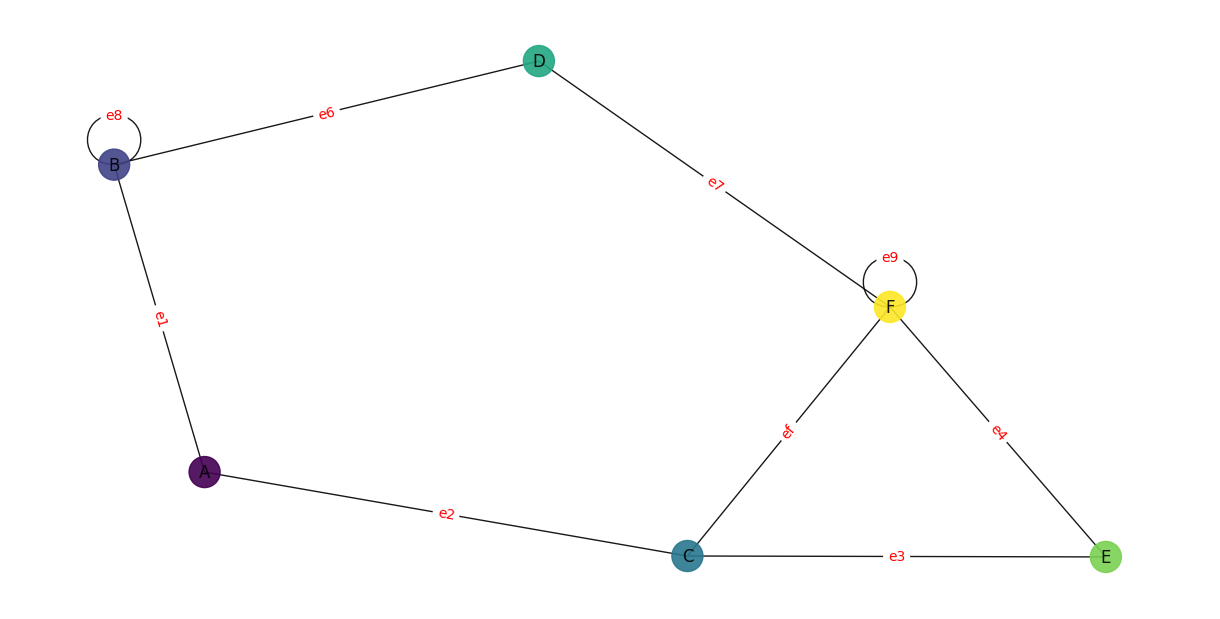

False
False


In [32]:

edge_labels={('A', 'B'): 'e1',  ('A', 'C'): 'e2', ('C', 'E'): 'e3', ('E', 'F'): 'e4', ('C', 'F'): 'ef', ('B', 'D'): 'e6', ('D', 'F'): 'e7'
  , ('B', 'B'): 'e8', ('F', 'F'): 'e9'}
all_edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'E'), ('C', 'F'),
     ('E', 'F'), ('D', 'F'),
     ('B', 'B'), ('F', 'F')]

G = nx.Graph() 
G.add_edges_from(all_edges)
    

val_map = {'A': 1.0,
           'B': 2.0,
           'C': 3.0,
           'D': 4.0, 'E': 5.0, 'F': 6.0}
values = [val_map.get(node, 0.25) for node in G.nodes()]

pos = nx.spring_layout(G)
plt.figure(figsize=(12,6))
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color=values, alpha=0.9,
    labels={node: node for node in G.nodes()}
)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels=edge_labels,
    font_color='red'
)
plt.axis('off')
plt.show()
print(nx.is_weighted(G))
print(nx.is_directed(G))

### Random walks

To generate 'sentences' from a graph, to generate an embedding for the nodes of a graph, one needs random walks.

In [33]:
import random
def get_randomwalk(graph_val, node, path_length):
    random_walk = [node]
    
    for i in range(path_length-1):
        temp = list(graph_val.neighbors(node))
        temp = list(set(temp) - set(random_walk))    
        if len(temp) == 0:
            break

        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk


In [37]:
from tqdm import tqdm
# get list of all nodes from the graph
all_nodes = list(G.nodes())

random_walks = []
for n in tqdm(all_nodes):
    for i in range(1,10):
        random_walks.append(get_randomwalk(G, n, i))
        
# count of sequences
print(f"number of random walks {len(random_walks)}")
print(random_walks)

100%|██████████| 6/6 [00:00<00:00, 5943.75it/s]

number of random walks 54
[['A'], ['A', 'B'], ['A', 'B', 'D'], ['A', 'B', 'D', 'F'], ['A', 'B', 'D', 'F', 'E'], ['A', 'C', 'F', 'D', 'B'], ['A', 'B', 'D', 'F', 'C', 'E'], ['A', 'B', 'D', 'F', 'C', 'E'], ['A', 'C', 'F', 'E'], ['B'], ['B', 'A'], ['B', 'D', 'F'], ['B', 'A', 'C', 'E'], ['B', 'A', 'C', 'E', 'F'], ['B', 'D', 'F', 'E', 'C', 'A'], ['B', 'A', 'C', 'E', 'F', 'D'], ['B', 'D', 'F', 'C', 'E'], ['B', 'D', 'F', 'E', 'C', 'A'], ['C'], ['C', 'F'], ['C', 'E', 'F'], ['C', 'F', 'D', 'B'], ['C', 'F', 'E'], ['C', 'E', 'F', 'D', 'B', 'A'], ['C', 'F', 'D', 'B', 'A'], ['C', 'F', 'D', 'B', 'A'], ['C', 'E', 'F', 'D', 'B', 'A'], ['D'], ['D', 'B'], ['D', 'F', 'C'], ['D', 'F', 'C', 'E'], ['D', 'B', 'A', 'C', 'E'], ['D', 'B', 'A', 'C', 'F', 'E'], ['D', 'B', 'A', 'C', 'F', 'E'], ['D', 'B', 'A', 'C', 'F', 'E'], ['D', 'F', 'E', 'C', 'A', 'B'], ['E'], ['E', 'F'], ['E', 'C', 'F'], ['E', 'F', 'C', 'A'], ['E', 'F', 'C', 'A', 'B'], ['E', 'F', 'D', 'B', 'A', 'C'], ['E', 'F', 'D', 'B', 'A', 'C'], ['E', 'F', '

## Using a GNN (Graph Neural Network) to generate a node embedding

In this part I am going to introduce a GNN to create a node embedding. At first a basic dataset is going to be assessed using some simple operations. But first let's perform some installs and imports.

In [38]:
%pip install pyg_lib torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.8.0+cpu.html
%pip install torch-geometric

Looking in links: https://data.pyg.org/whl/torch-2.8.0+cpu.html
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [42]:
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.datasets import KarateClub

c:\Users\wilfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'pyg-lib'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\wilfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\libpyg.pyd
  import torch_geometric.typing
c:\Users\wilfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\wilfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch_scatter\_version_cpu.pyd
  import torch_geometric.typing
c:\Users\wilfr\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch_geometric\__init__.py:4: UserWarning: An issue occurred while importing 'torch-cluster'. Disabling its usage. Stacktrace: Could not load this library: C:\Users\wilfr\AppData\Local\Programs\Python\Python312\Lib\site-

In [43]:
dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Number of Node Features: {dataset.num_node_features}')
print(f'Number of Edge Features: {dataset.num_edge_features}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4
Number of Node Features: 34
Number of Edge Features: 0


### Data

The data to be used in the network is on the first element of the data set.

So by setting the 'data=dataset[0] one can access this data.

This data contains elements like: 
-The edge_index property holds the information about the graph connectivity, i.e., a tuple of source and destination node indices for each edge.

-Node features as x (each of the 34 nodes is assigned a 34-dim feature vector)

-Node labels as y (each node is assigned to exactly one class).

-The train mask allows to select the nodes to use as training elements


In [45]:
data = dataset[0]
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [49]:
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is Directed: {data.is_directed()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Edge weight: {data.edge_weight}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')

Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Has isolated nodes: False
Has self-loops: False
Is Directed: False
Is undirected: True
Edge weight: None
Number of training nodes: 4
Training node label rate: 0.12


### How the data looks like

In this part the data can be seen when looking thoroughly.

In [ ]:
data.node_stores

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


[{'x': tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]), 'edge_index': tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
           1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
           3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
           7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
          13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
          21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
          27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
          31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
          33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
    

### Showing the edges as a tensor of size number of edges times 2

In [51]:
edge_index = data.edge_index
print(edge_index.t())
print(edge_index.t().shape)

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

### Graph classes
Every node has a class. So y is a tensor of size 34 times 1, containing values 0 to 3 in every place.

In [52]:
print(f'Number of classes: {dataset.num_classes}')
print(data.y)

Number of classes: 4
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


### Node features
Every node has an embedding of 34 elements.At this moment every node embedding is a unique element from the identity matrix. The embedding is represented by the data.x tensor.

In [61]:
print(data.num_node_features)
print(data.num_features)
print(data.num_nodes)
print(data.x)
print(data.x.shape)
print(f"Is data.x an identity matrix: {torch.equal(data.x, torch.eye(34))}")

34
34
34
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])
torch.Size([34, 34])
Is data.x an identity matrix: True


### Graph visualisation

The graph from the karateclub dataset visualized. As the data.y tensor contains the labels for the nodes the nodes can be typed.

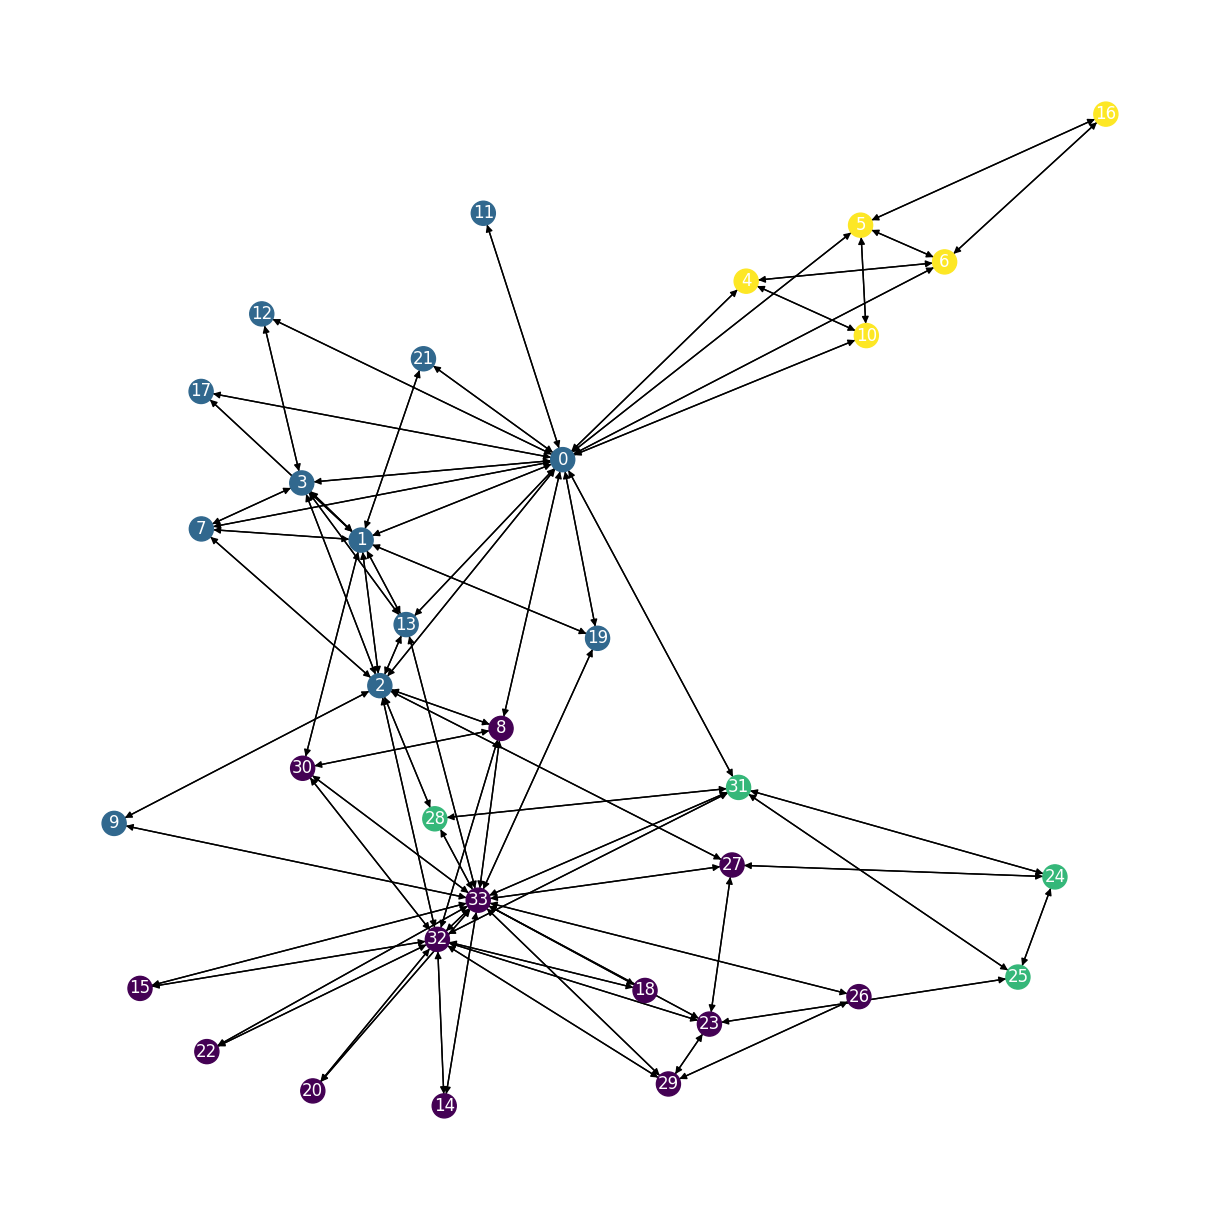

In [56]:
from torch_geometric.utils.convert import to_networkx
karate_directed_graph = to_networkx(data)
plt.figure(figsize=(12,12))
nx.draw(karate_directed_graph, cmap=plt.get_cmap('viridis'), with_labels=True, node_color=data.y, font_color='white')

## GNN

### Objective

There are 30 nodes with unknown label. Only 4 nodes have a label. The 4 nodes all have a different label. The target of the model is to generate embeddings for the nodes that have no embedding. Below is a comparison between the convolutional operators GCNConv and Conv2D.

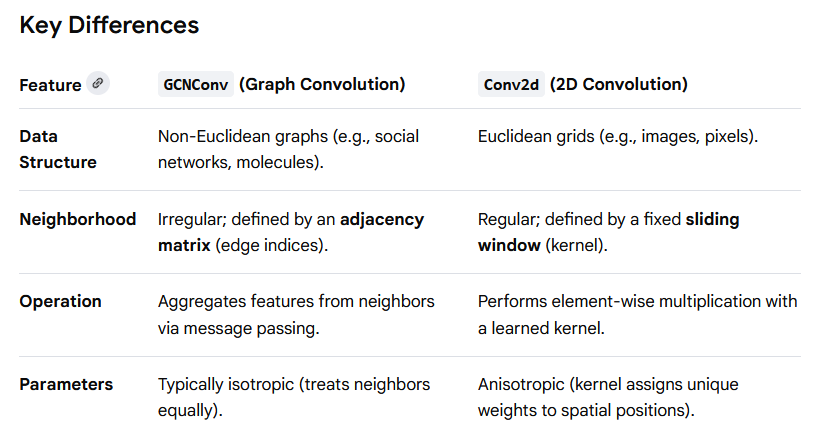

This model will generate a 2-dimensional embedding per node.

In [57]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()
        out = self.classifier(h)

        return out, h

### Showing the model's layers

In [58]:
model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


### Generate an untrained embedding

In [62]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')
print(h)

Embedding shape: [34, 2]
tensor([[ 0.0962,  0.0115],
        [ 0.0235,  0.0129],
        [ 0.0432,  0.0201],
        [ 0.0401,  0.0162],
        [ 0.0522, -0.0054],
        [ 0.0775,  0.0011],
        [ 0.0763,  0.0031],
        [ 0.0300,  0.0131],
        [ 0.0107,  0.0181],
        [ 0.0014,  0.0195],
        [ 0.0575, -0.0035],
        [ 0.0867,  0.0090],
        [ 0.0353,  0.0106],
        [ 0.0242,  0.0179],
        [-0.0114,  0.0138],
        [-0.0109,  0.0173],
        [ 0.0740,  0.0046],
        [ 0.0188,  0.0012],
        [-0.0139,  0.0210],
        [ 0.0068,  0.0108],
        [ 0.0077,  0.0168],
        [ 0.0014,  0.0033],
        [-0.0065,  0.0175],
        [ 0.0657,  0.0242],
        [ 0.1390,  0.0069],
        [ 0.1296,  0.0110],
        [-0.0140,  0.0309],
        [ 0.0852,  0.0189],
        [ 0.0415,  0.0141],
        [ 0.0032,  0.0333],
        [-0.0036,  0.0152],
        [ 0.0995,  0.0135],
        [ 0.0102,  0.0337],
        [ 0.0181,  0.0381]], grad_fn=<TanhBackward0

In [63]:
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(12,8))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

In [29]:
from sklearn.manifold import TSNE

def visualize_tsne(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

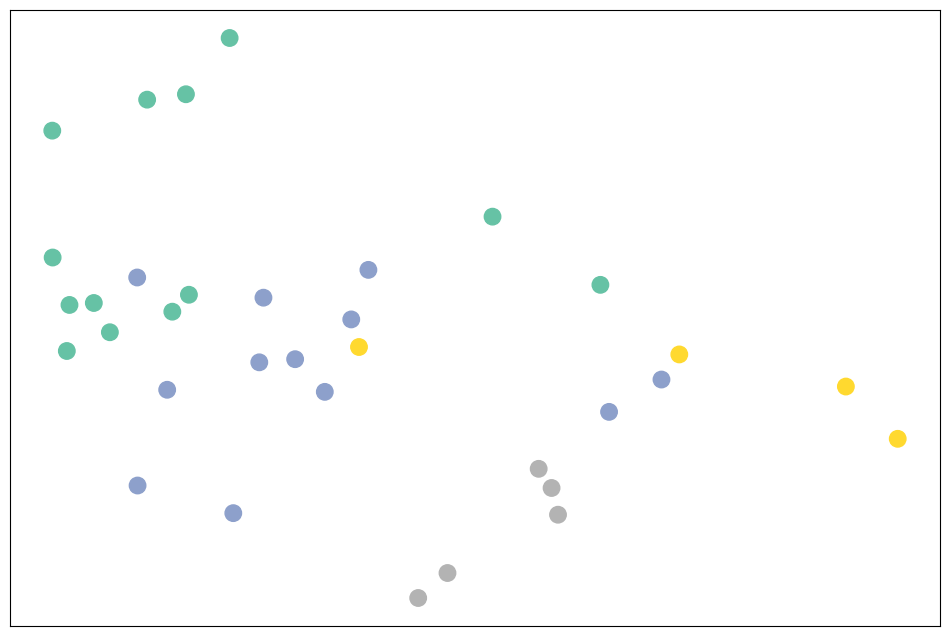

In [64]:
visualize_embedding(h, color=data.y)

In [71]:
model = GCN()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

### Training the network

Every epoch, the 2-dimensional embedding is being adapted.

In [72]:
def train(data):
    optimizer.zero_grad()
    out, h = model(data.x, data.edge_index)
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss, h

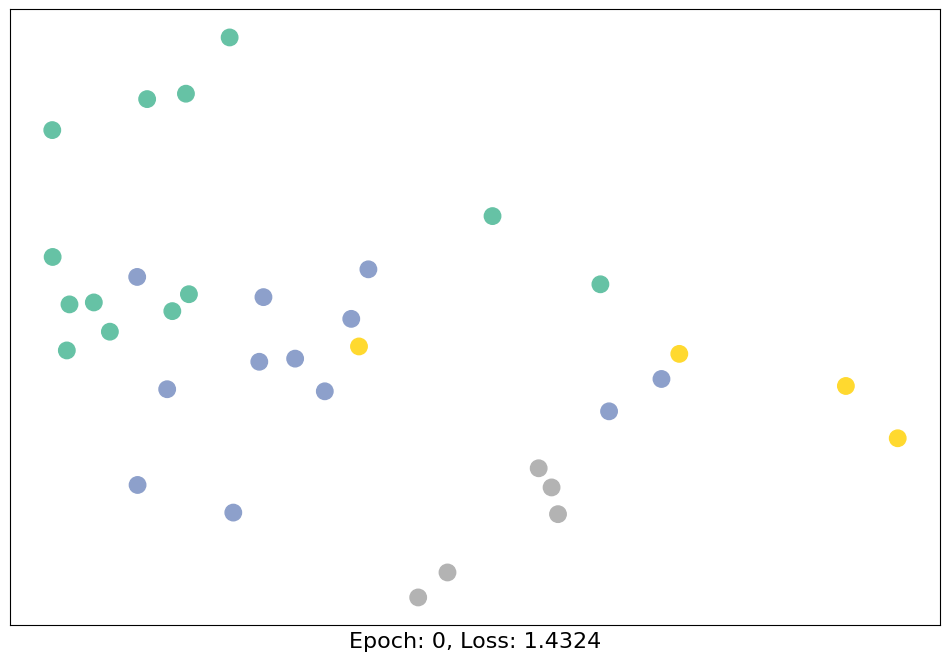

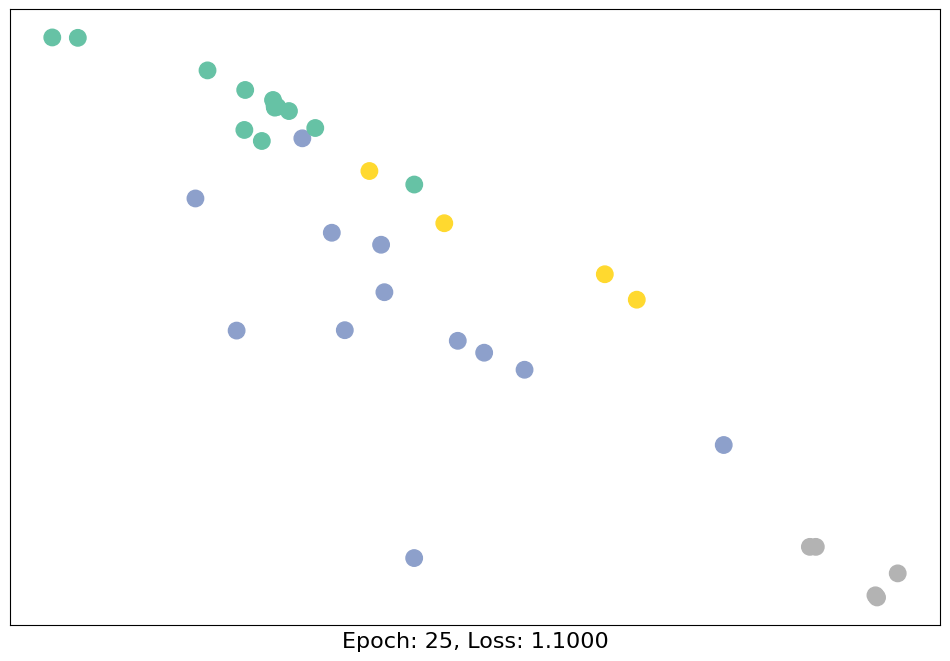

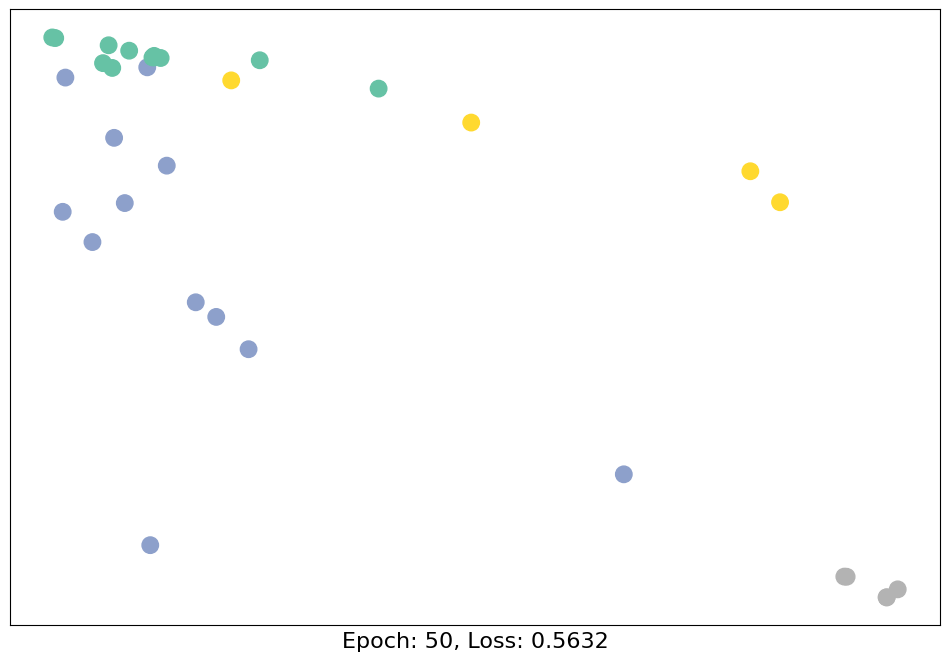

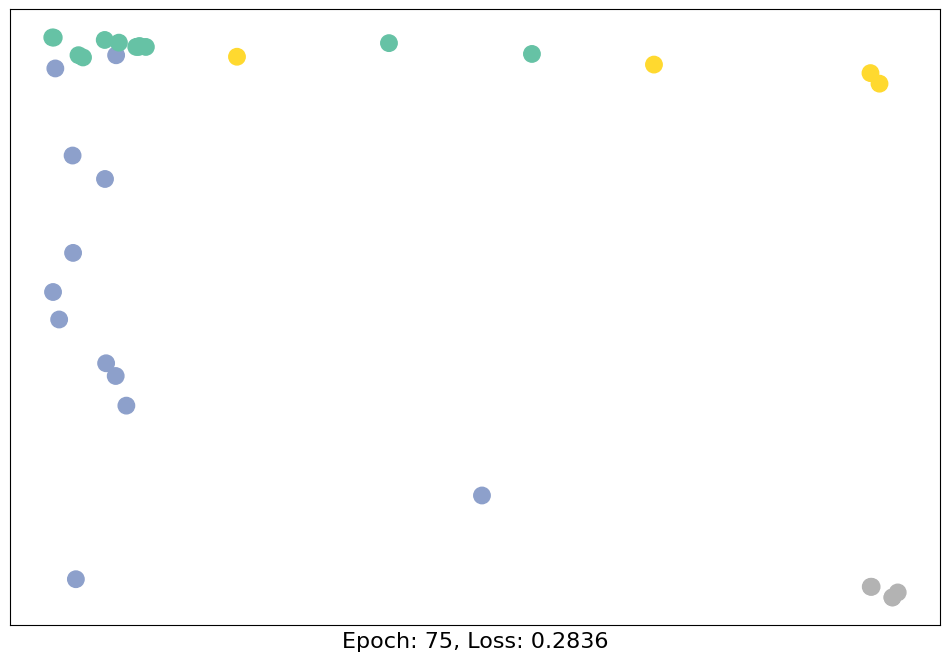

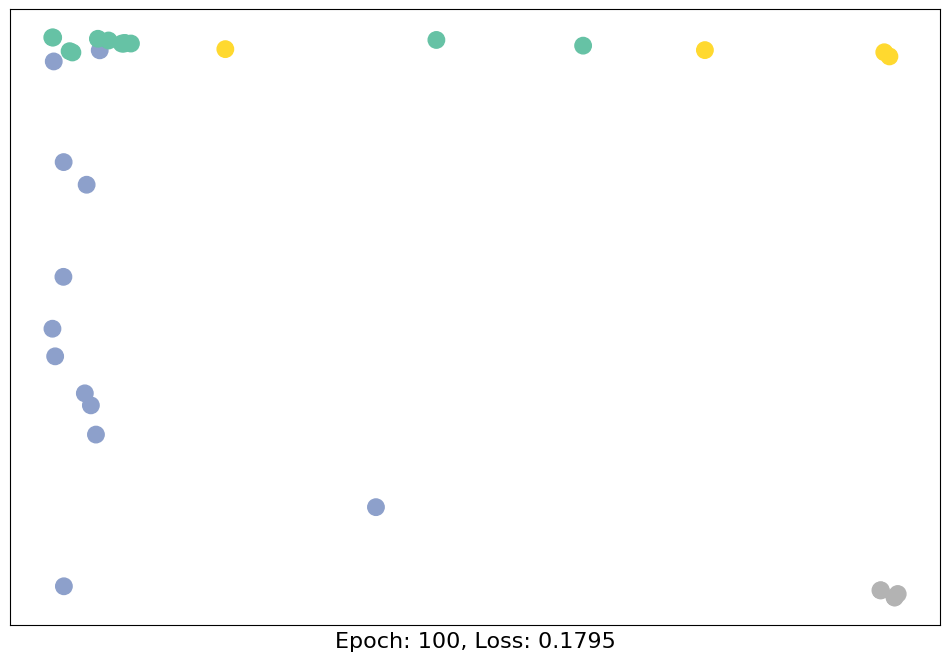

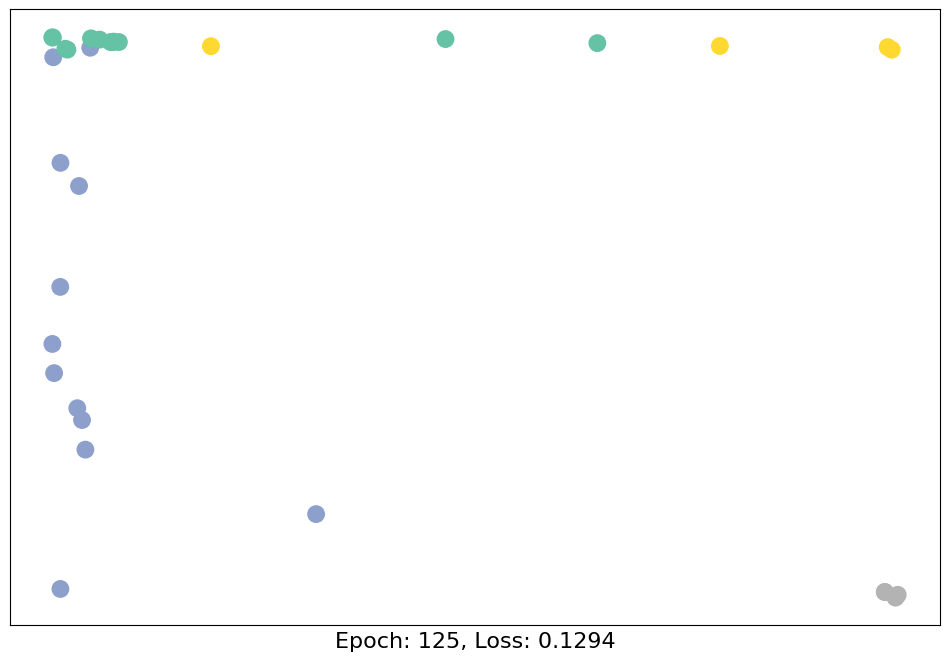

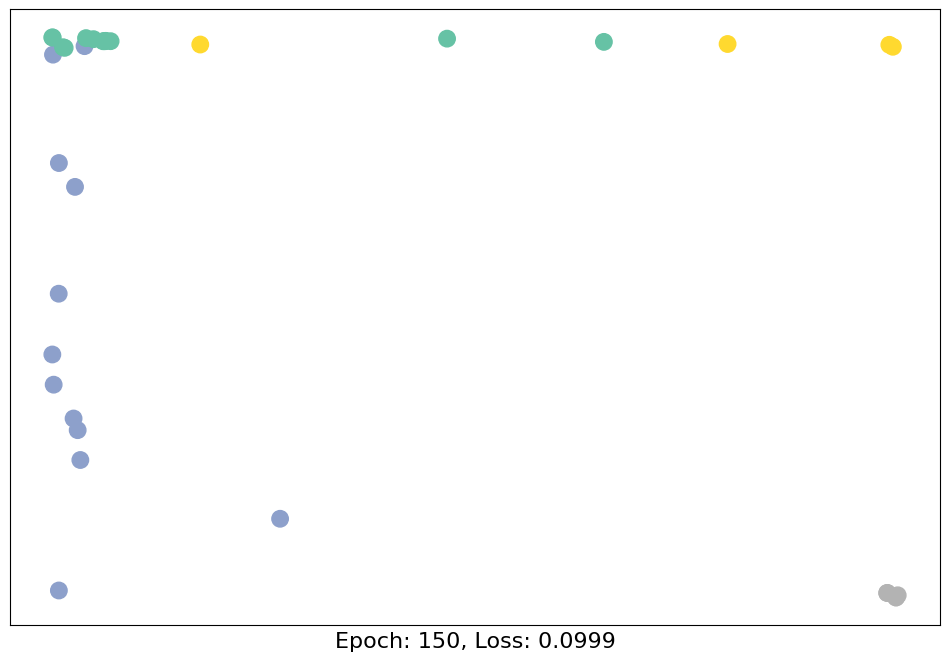

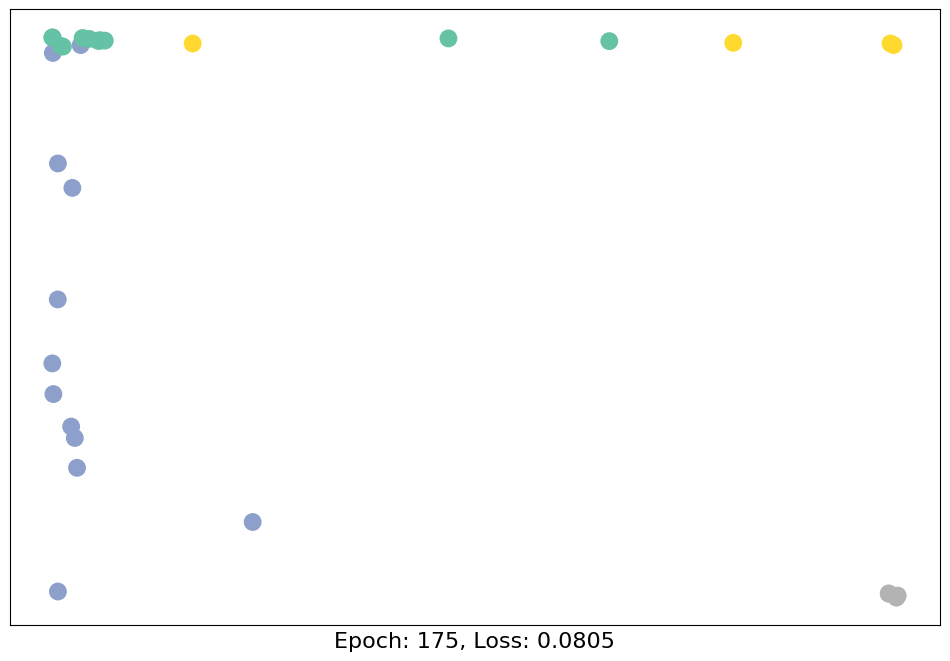

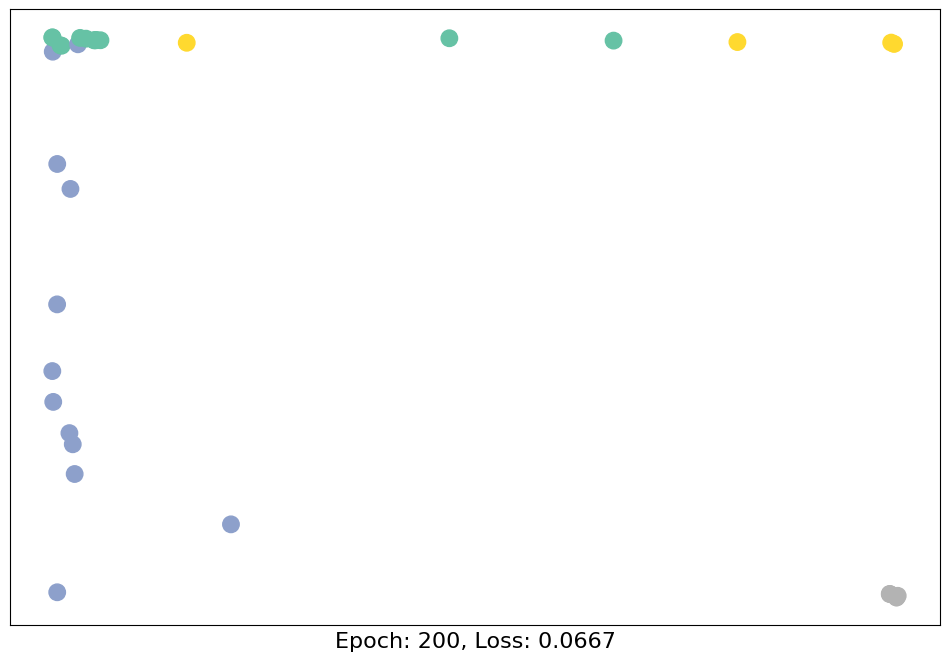

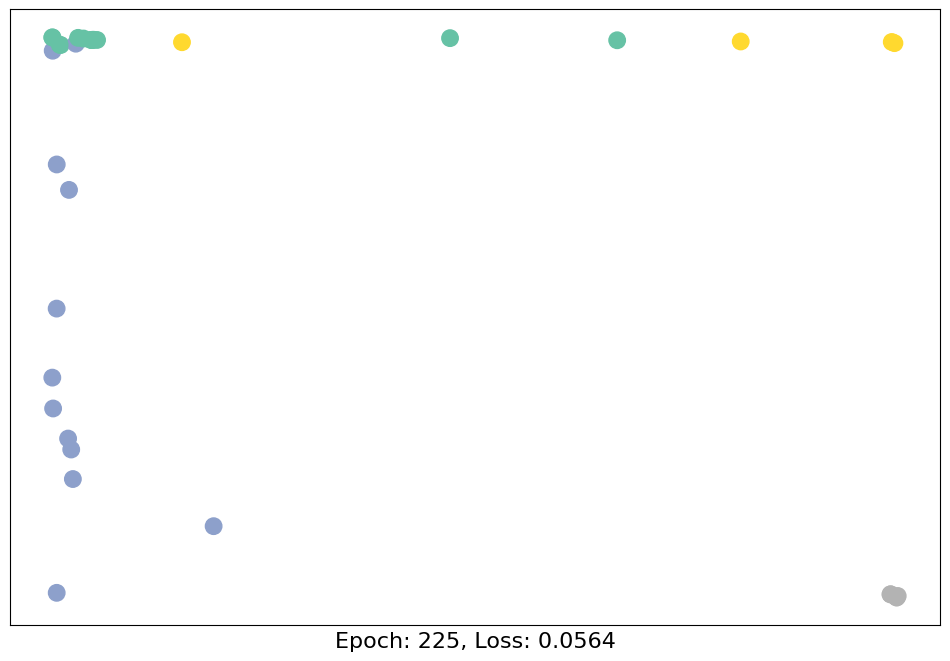

In [73]:
import time
for epoch in range(250):
    loss, h = train(data)
    if epoch % 25 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)
        final_h = h

### Another visualisation

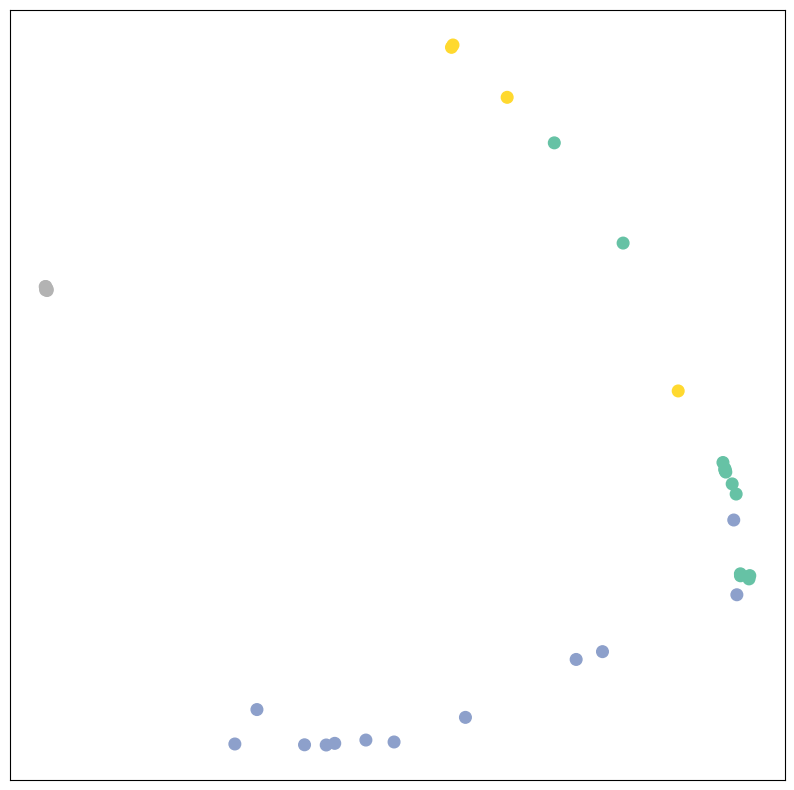

In [34]:
visualize_tsne(h, color=data.y)

## Node classification

In this part a model will be build that will predict a node's topic, based on the nodes it cites, it is cited by. The dataset used is Cora. A citation network.


In [167]:
import torch.nn.functional as F
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures
import torch.nn as nn

In [ ]:
dataset = Planetoid(root='/tmp/Cora', name='Cora', transform=NormalizeFeatures())
data = dataset[0]
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [140]:
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes (papers): {data.num_nodes}')
print(f'Number of edges (citations): {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of features per node: {dataset.num_node_features}')
print(f'Number of features per edge: {dataset.num_edge_features}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is Directed: {data.is_directed()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Edge weight: {data.edge_weight}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Number of test nodes: {data.test_mask.sum()}')
print(f'Number of validation nodes: {data.val_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Number of classes (subjects): {dataset.num_classes}')

Number of nodes (papers): 2708
Number of edges (citations): 10556
Average node degree: 3.90
Number of features per node: 1433
Number of features per edge: 0
Has isolated nodes: False
Has self-loops: False
Is Directed: False
Is undirected: True
Edge weight: None
Number of training nodes: 140
Number of test nodes: 1000
Number of validation nodes: 500
Training node label rate: 0.05
Number of classes (subjects): 7


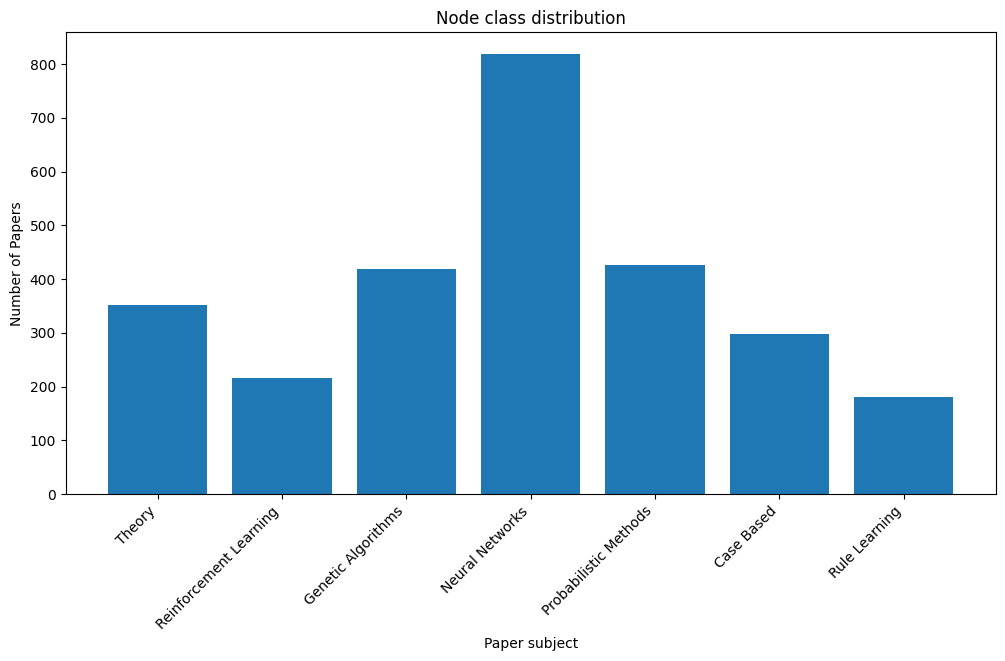

In [239]:
class_counts = torch.bincount(data.y)
class_names = ['Theory', 'Reinforcement Learning', 'Genetic Algorithms', 
               'Neural Networks', 'Probabilistic Methods', 'Case Based', 'Rule Learning']
class_colors = []
r = random.random
for i in range(0,len(class_names)):
    rgb =  (r(),r(),r())
    class_colors.append(rgb)



plt.figure(figsize=(12, 6))
plt.bar(class_names, class_counts)
plt.title('Node class distribution')
plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right')
plt.xlabel('Paper subject')
plt.ylabel('Number of Papers')
plt.show()



### Visualizing a part of the Cora dataset

To get an idea of the datasets' structure a subset of it is visualized below. As not all nodes are connected to the selected nodes, only some 'complete' citation structures are visible.

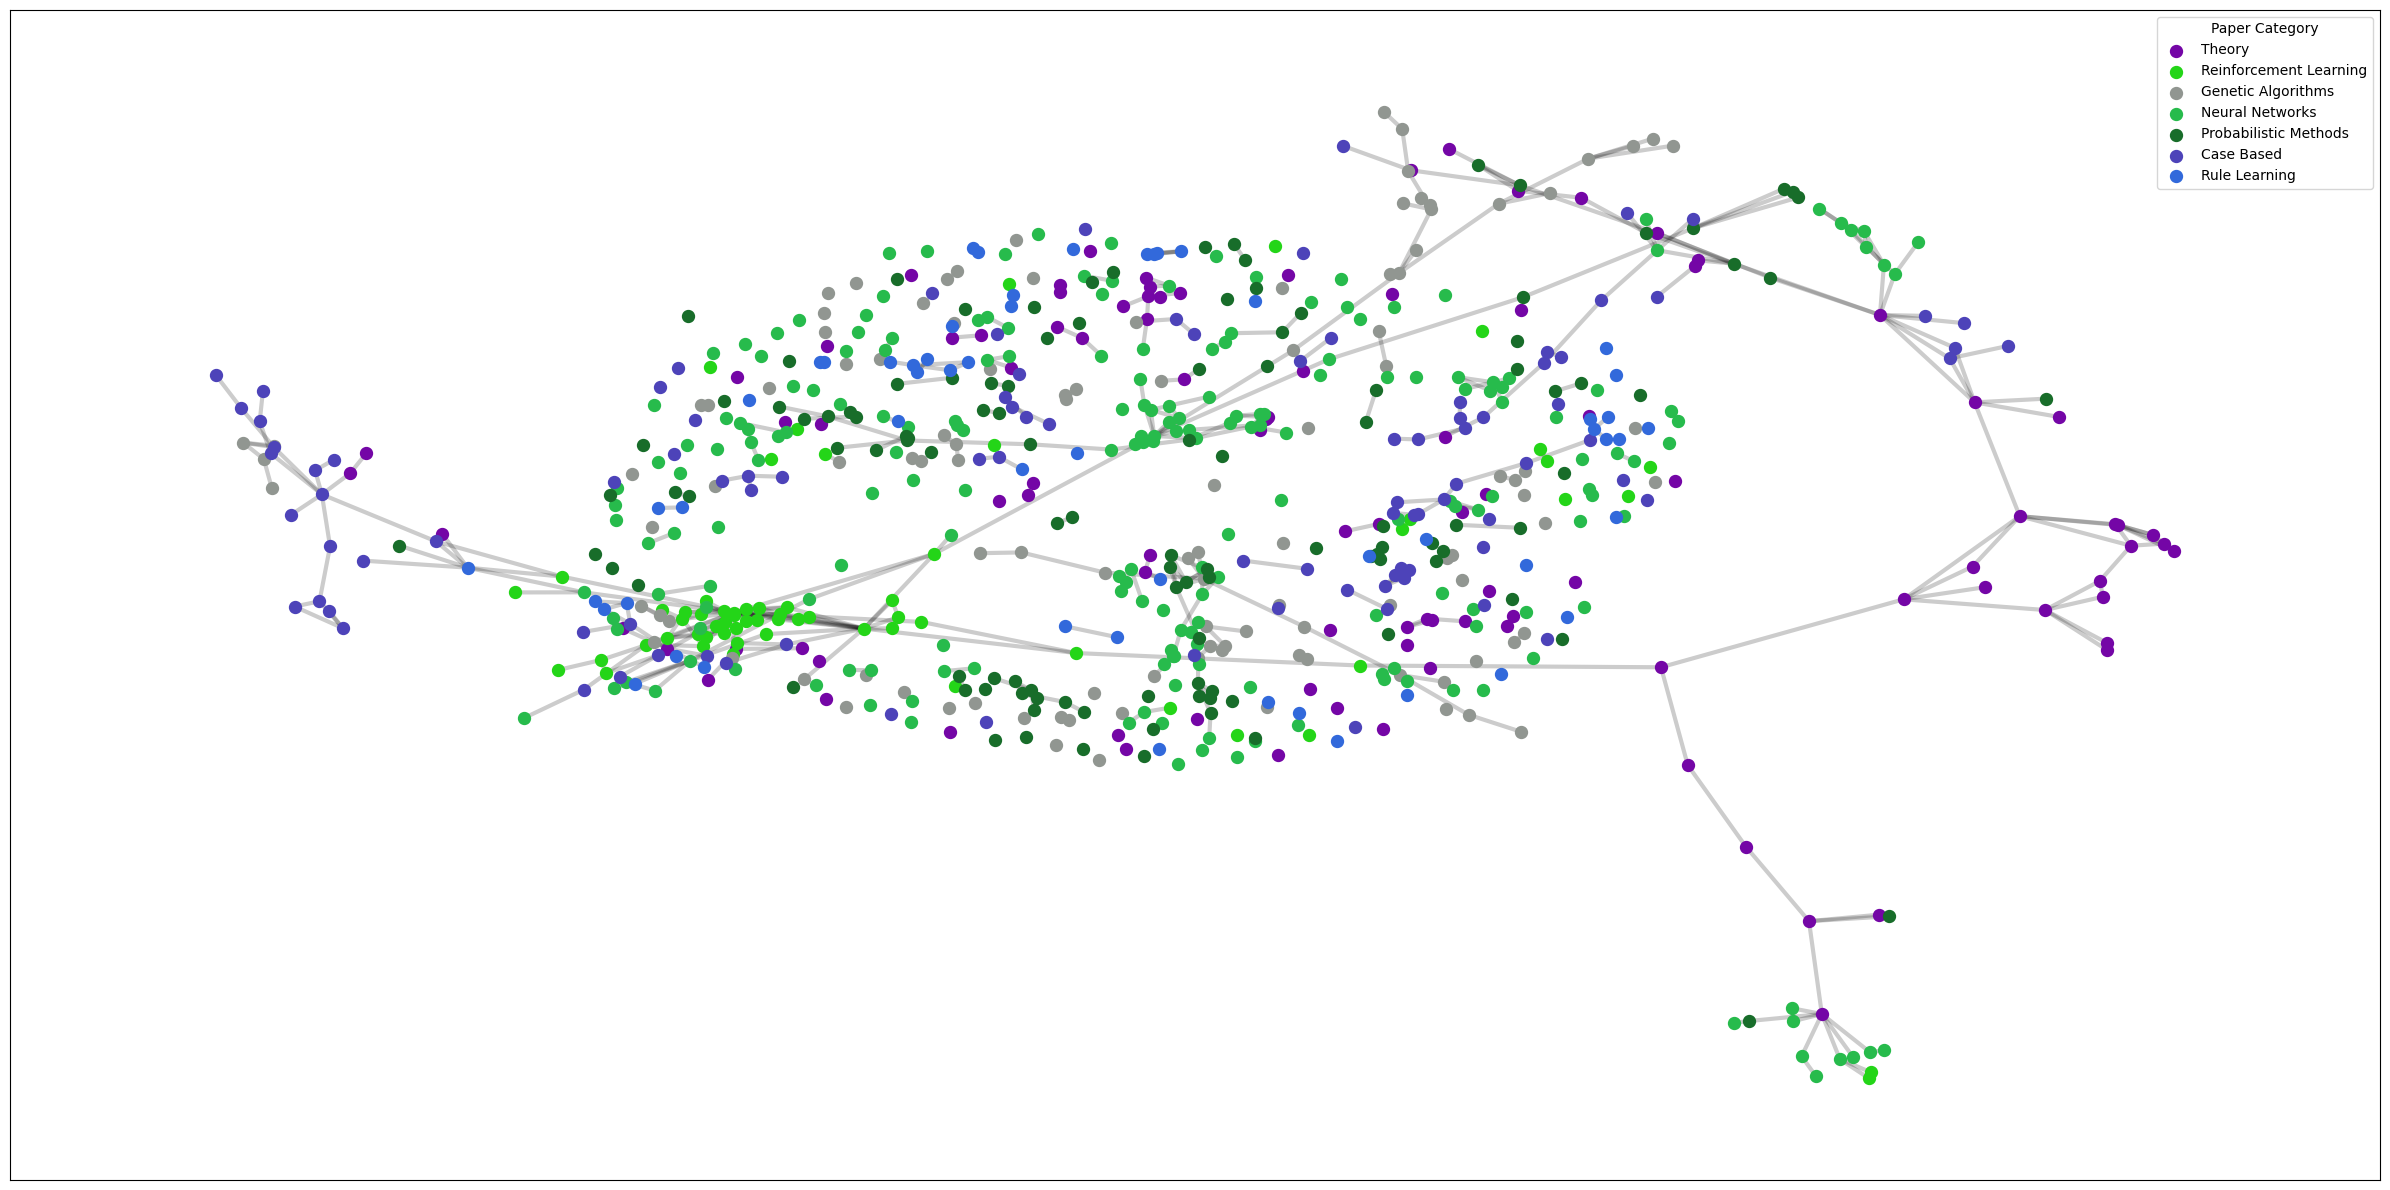

In [243]:
def visualize_graph():
    # Convert to networkx graph
    G = to_networkx(data, to_undirected=True)
    plt.figure(figsize=(24, 12))

    nodes_subset = list(range(750))
    node_labels_subset = data.y[nodes_subset].numpy()
    G_sub = G.subgraph(nodes_subset)
    pos = nx.spring_layout(G_sub, seed=42)

    nx.draw_networkx_edges(G_sub, pos, alpha=0.2, edge_color="#000000", width=3)
    for i in range(dataset.num_classes):
        nx.draw_networkx_nodes(
            G_sub, pos, 
            nodelist=[n for n, label in enumerate(node_labels_subset) if label == i],
            node_color=class_colors[i], 
            node_size=50,  
            linewidths=2.5,
            label=class_names[i]
        )

    legend = plt.legend(title='Paper Category', loc='upper right')
    plt.tight_layout()

visualize_graph()

In [141]:
edge_index = data.edge_index
print(edge_index.t().shape)

torch.Size([10556, 2])


### Embedding odf a node

The embedding of a node is a normalized  vector counting the occurence of 1433 unique words like 'ReLu', 'Embedding',....


In [174]:
print(data.x.shape)
print("sum for every row")
sum_every_row=torch.sum(data.x, dim=1)
print(sum_every_row)
print(sum_every_row.shape)

torch.Size([2708, 1433])
sum for every row
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.000

https://medium.com/@f237811/visualizing-knowledge-networks-deep-dive-into-graph-convolutional-networks-with-the-cora-dataset-247901192347

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels, dropout=0.5):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.dropout = dropout
        self.bn = torch.nn.BatchNorm1d(hidden_channels)
        
    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.bn(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        return x
    
    def get_embeddings(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.bn(x)
        x = F.relu(x)
        return x

### Model overview

Initializing the model and show how its layers are configured.

In [229]:
model = GCN(in_channels=dataset.num_features, 
            hidden_channels=32, 
            out_channels=dataset.num_classes,
            dropout=0.4) 
print(model)


GCN(
  (conv1): GCNConv(1433, 32)
  (conv2): GCNConv(32, 7)
  (bn): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


### Training

By dynamically adjusting the learning rate, training a complex model can sometimes become faster or be improved.

torch.optim.lr_scheduler.ReduceLROnPlateau is such a scheduler, it dynamically adjusts the learning rate based on validation performance, e.g. when the model hits a performance plateau. Later on when training the scheduler will get triggered by:

```scheduler.step(val_acc)```

Setting it using the following command:

``` 
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.7, patience=10)
```

>Patience: Number of epochs to wait before reducing the rate.

>Factor: Multiplicative factor by which the learning rate decreases.

>Mode: 'max' mode learning rate will be reduced when the quantity monitored (in this case val_acc, or validation accuracy) has stopped increasing for 10 epochs.


To address class imbalance, a weight can be assigned to each class that is inversely proportional to its frequency. 
This weight tensor can be used in torch.nn.CrossEntropyLoss as follows:
``` 
weighted_criterion=nn.CrossEntropyLoss(weight=class_weights)
```

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.03, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.7, patience=5)
criterion = nn.CrossEntropyLoss()
class_weights = 1.0 / class_counts.float()
class_weights = class_weights / class_weights.sum() * len(class_counts)
weighted_criterion = nn.CrossEntropyLoss(weight=class_weights)
print(f"class_counts: {class_counts}")
print(f"class weights: {class_weights}")

class_counts: tensor([351, 217, 418, 818, 426, 298, 180])
class weights: tensor([0.8931, 1.4446, 0.7499, 0.3832, 0.7358, 1.0519, 1.7415])


### Training and evaluating

Training loss is calculated by comparing the predicted node class for a node and the known node class in a CrossEntropyLoss.

Evaluation accuracy is the number of correct predictions divided by all predictions made.

In [181]:
def train():
    model.train()
    optimizer.zero_grad()
    output = model(data.x, data.edge_index)
    loss = weighted_criterion(output[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss

def evaluate(mask):
    model.eval()
    with torch.no_grad():
        output = model(data.x, data.edge_index)
        pred = output.argmax(dim=1)
        correct = pred[mask] == data.y[mask]
        acc = int(correct.sum()) / int(mask.sum())
    return acc, pred

### The training loop

Epoch: 020, Loss: 0.0038, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 040, Loss: 0.0023, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 060, Loss: 0.0033, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 080, Loss: 0.0023, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 100, Loss: 0.0019, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 120, Loss: 0.0051, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 140, Loss: 0.0043, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 160, Loss: 0.0041, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 180, Loss: 0.0025, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 200, Loss: 0.0053, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 220, Loss: 0.0108, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 240, Loss: 0.0056, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 260, Loss: 0.0029, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 280, Loss: 0.0024, Train Acc: 1.0000, Val Acc: 0.7460
Epoch: 300, Loss: 0.0055, Train Acc: 1.0000, Val Acc: 0.7460


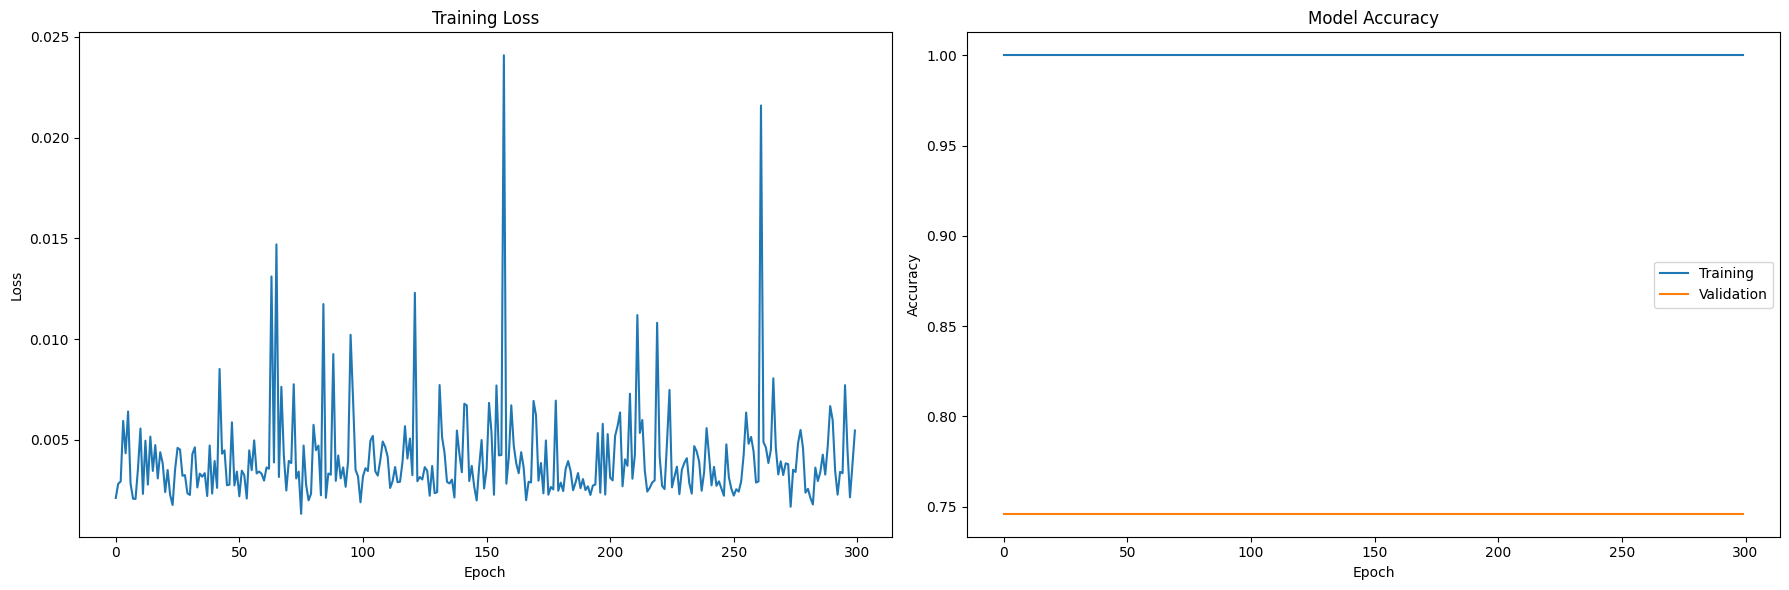

In [234]:
losses = []
train_accs = []
val_accs = []
epochs = 300

for epoch in range(epochs):
    loss = train()
    losses.append(loss.item())
    
    train_acc, _ = evaluate(data.train_mask)
    val_acc, _ = evaluate(data.val_mask)
    
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    scheduler.step(val_acc)
    
    if (epoch + 1) % 20 == 0:
        print(f'Epoch: {epoch+1:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}')

plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Training')
plt.plot(val_accs, label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig("training_curves.png", dpi=300, facecolor='white')

In [247]:
import sklearn
from sklearn.manifold import TSNE

def visualize_embeddings():
    model.eval()
    with torch.no_grad():
        embeddings = model.get_embeddings(data.x, data.edge_index).numpy()
        tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
        embeddings_2d = tsne.fit_transform(embeddings)
        
        plt.figure(figsize=(14, 10))
        for i in range(dataset.num_classes):
            mask = data.y.numpy() == i
            plt.scatter(embeddings_2d[mask, 0], embeddings_2d[mask, 1], 
                        c=[class_colors[i]], label=class_names[i], 
                        alpha=0.8, s=60, edgecolors='white', linewidth=0.8)
        
        plt.title('Node Embedding Visualization')
        plt.legend(title='Paper Category')
        plt.tight_layout()
        plt.savefig("node_embeddings.png", dpi=300)



### t-SNE on trained model

t-SNE reduces complex datasets (with hundreds or thousands of features) into a 2D or 3D map. Its primary strength is preserving local structure, meaning points that are close to each other in high-dimensional space remain close in the visualization.

As can be seen from the plot, the embeddings for the nodes are separating the paper's subject quiet well.

In [ ]:
visualize_embeddings()

### t-SNE on untrained model

t-SNE reduces complex datasets (with hundreds or thousands of features) into a 2D or 3D map. Its primary strength is preserving local structure, meaning points that are close to each other in high-dimensional space remain close in the visualization.

As can be seen from the plot, the embeddings for the nodes are separating the paper's subject quiet well.

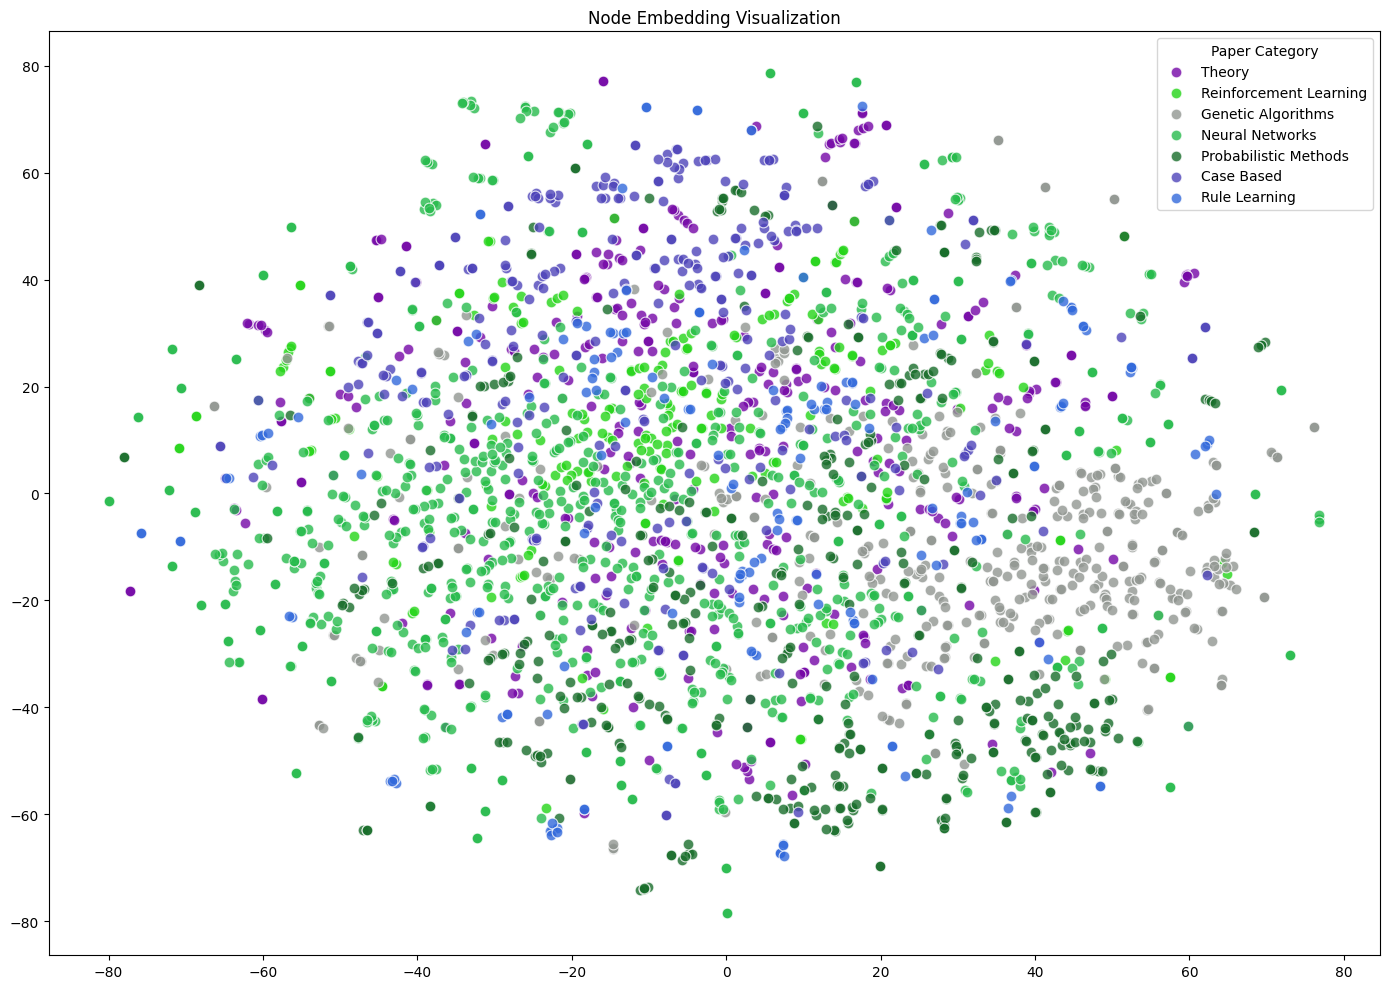

In [ ]:
model = GCN(in_channels=dataset.num_features, 
            hidden_channels=32, 
            out_channels=dataset.num_classes,
            dropout=0.4) 
visualize_embeddings()

### Conclusions

As I am looking into Graph Neural Networks, https://medium.com/@f237811/visualizing-knowledge-networks-deep-dive-into-graph-convolutional-networks-with-the-cora-dataset-247901192347


In [ ]:
#https://medium.com/the-modern-scientist/graph-neural-networks-series-part-4-the-gnns-message-passing-over-smoothing-e77ffee523cc

In [ ]:
class PredictNodeClass(torch.nn.Module):
    def __init__(self, dataset):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

In [122]:
model = PredictNodeClass(dataset)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
print(model)

PredictNodeClass(
  (conv1): GCNConv(1433, 16)
  (conv2): GCNConv(16, 7)
)


In [123]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def test():
    model.eval()
    out = model(data)
    pred = out.argmax(dim=1)
    correct = pred[data.test_mask] == data.y[data.test_mask]
    acc = int(correct.sum()) / int(data.test_mask.sum())
    return acc


In [125]:
print("\n--- Starting GNN Training ---")
losses = []
accuracies = []
for epoch in range(1, 401):
    loss = train()
    test_acc = test()
    losses.append(loss)
    accuracies.append(test_acc)
    if epoch % 20 == 0:
        print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Test Accuracy: {test_acc:.4f}')

print("--- Training Complete ---")


--- Starting GNN Training ---
Epoch: 020, Loss: 0.0322, Test Accuracy: 0.8050
Epoch: 040, Loss: 0.0588, Test Accuracy: 0.8060
Epoch: 060, Loss: 0.0268, Test Accuracy: 0.8000
Epoch: 080, Loss: 0.0290, Test Accuracy: 0.7990
Epoch: 100, Loss: 0.0229, Test Accuracy: 0.8110
Epoch: 120, Loss: 0.0275, Test Accuracy: 0.8000
Epoch: 140, Loss: 0.0170, Test Accuracy: 0.8040
Epoch: 160, Loss: 0.0363, Test Accuracy: 0.7930
Epoch: 180, Loss: 0.0205, Test Accuracy: 0.8000
Epoch: 200, Loss: 0.0284, Test Accuracy: 0.8010
Epoch: 220, Loss: 0.0218, Test Accuracy: 0.7970
Epoch: 240, Loss: 0.0144, Test Accuracy: 0.8060
Epoch: 260, Loss: 0.0217, Test Accuracy: 0.8000
Epoch: 280, Loss: 0.0144, Test Accuracy: 0.8080
Epoch: 300, Loss: 0.0132, Test Accuracy: 0.8150
Epoch: 320, Loss: 0.0188, Test Accuracy: 0.8030
Epoch: 340, Loss: 0.0130, Test Accuracy: 0.7980
Epoch: 360, Loss: 0.0148, Test Accuracy: 0.8090
Epoch: 380, Loss: 0.0159, Test Accuracy: 0.8100
Epoch: 400, Loss: 0.0372, Test Accuracy: 0.7970
--- Train

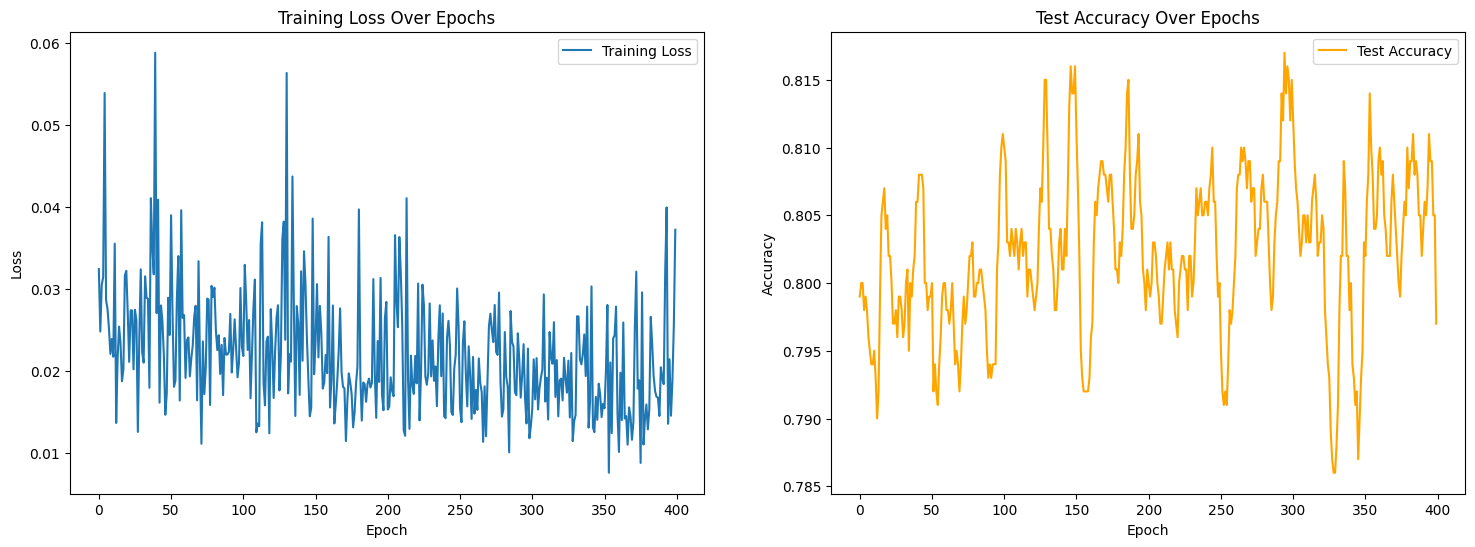

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
ax1.plot(losses, label='Training Loss')
ax1.set_title('Training Loss Over Epochs')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(accuracies, label='Test Accuracy', color='orange')
ax2.set_title('Test Accuracy Over Epochs')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()
